# Filtering Based Image Enhancement


**image filtering** : memodifikasi gambar berdasarkan beberapa fungsi ketetanggan lokal pada setiap piksel

Contoh sederhana : linear filtering (convolution)
- mengganti nilai piksel individu dengan hasil kombinasi linear tetangganya
- menggunakan *mask/kernel/filter* dengan ukuran nxn (diutamakan n ganjil)
- Ilustrasi : 
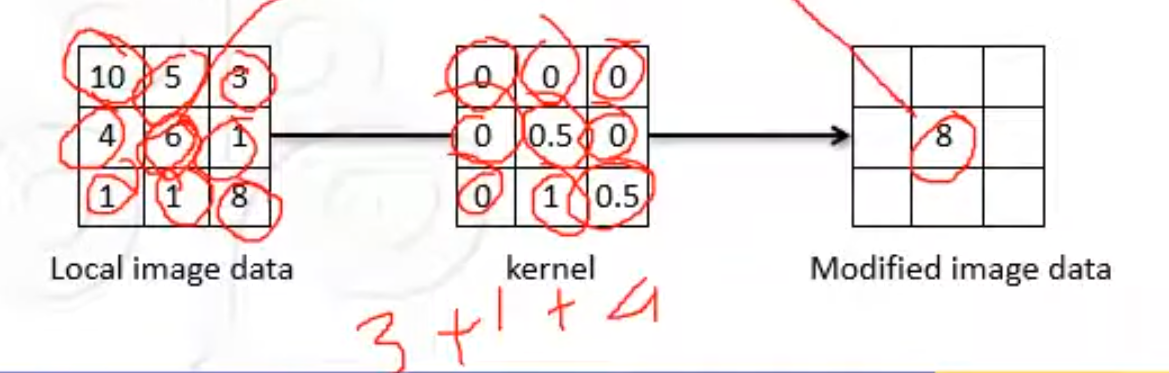
- fungsi filtering :
    1. sharpening (penajaman)
    2. smoothing (bluring)


## Correlation

**Correlation** : adalah proses memanipulasi dua gambar dengan menumpuknya satu sama lain. Gambar pertama disebut gambar, sedangkan gambar kedua disebut sebagai filter/mask/kernel. Nilai piksel dalam kernel disebut koefisien kernel. Karena besarnya koefisien tidak berubah seiring bergesernya kernel, proses ini disebut *linear filtering*

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


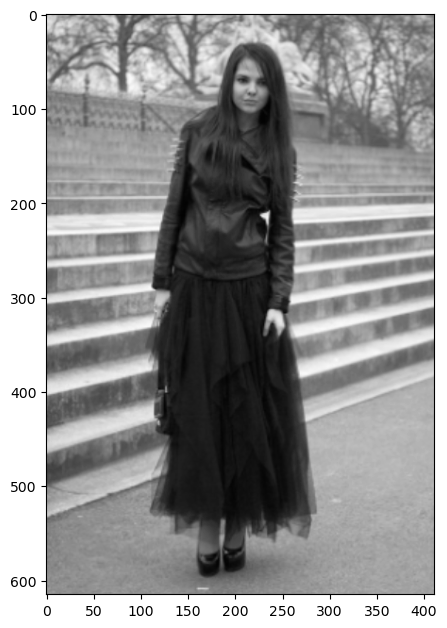

In [2]:
# The Image
image = cv.imread('img/girl-fashion.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(5, 8))
plt.imshow(image, cmap='gray', vmin=0, vmax=256)
plt.show()

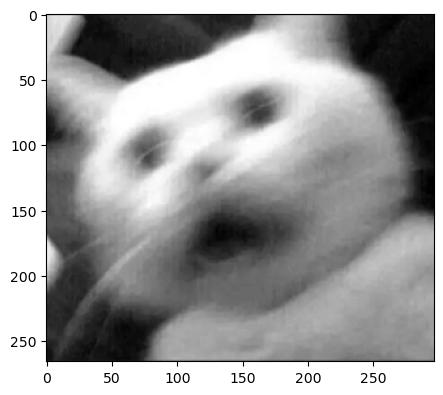

In [3]:
# The Mask
mask = cv.imread('img/mask.png')
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap='gray')  # Pastikan grayscale ditampilkan
plt.show()


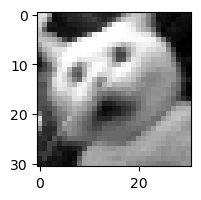

In [4]:
# resize to a smaller mask for better computational speed
mask_resized = cv.resize(mask, (31, 31))
plt.figure(figsize=(2, 2))
plt.imshow(mask_resized, cmap='gray')
plt.show()

In [5]:
image.shape, mask.shape, mask_resized.shape

((615, 411), (266, 297), (31, 31))

In [8]:
# Perform correlation by sliding the mask over the image pixel-by-pixel
result_rows = image.shape[0]-mask_resized.shape[0] + 1
result_columns = image.shape[1]-mask_resized.shape[1] + 1
result = np.zeros([result_rows, result_columns])

# normalize the mask before processing
mask_resized = mask_resized/255

# cross correlation 
for r in range(result_rows):
    for c in range(result_columns):
        # mengalikan element wise setiap piksel dari gambar dan mask dari posisi r sampai r+tinggi mask dan dari c sampai c+lebar mask
        val = np.multiply(image[r:r+mask_resized.shape[0], c:c+mask_resized.shape[1]], mask_resized) 
        # menjumlahkan hasil perkalian piksel
        val = np.sum(np.ravel(val)) # ravel digunakan untuk menguraikan array 2d menjadi 1d untuk kemudahan penjumlahan
        # nilai akhir val yang dinormalisasi disimpan balik ke result 
        result[r][c] = val/np.prod(mask_resized.shape)

plt.figure(figsize=(5, 8))
plt.imshow(result, cmap='gray')
plt.show()

ValueError: operands could not be broadcast together with shapes (31,31) (266,297) 